Objetivo de este modelo base: El objetivo de este proyecto es desarrollar un modelo de predicción de precios de Bitcoin con métodos de aprendizaje automático utilizando datos de series temporales. Empleando algoritmos como la regresión lineal y las máquinas de soporte vectorial (SVM) con diferentes funciones de núcleo y parámetros, el proyecto busca identificar el modelo que minimice el error en la predicción de precios de cierre de Bitcoin.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
df_daily = pd.read_csv('bitcoin_2017_to_2023.csv', parse_dates=['timestamp'])
df_daily.set_index('timestamp', inplace=True)

daily_data = df_daily.resample('D').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum',
    'quote_asset_volume': 'sum',
    'number_of_trades': 'sum',
    'taker_buy_base_asset_volume': 'sum',
    'taker_buy_quote_asset_volume': 'sum'
})

In [4]:
df_hourly = pd.read_csv('bitcoin_2017_to_2023.csv', parse_dates=['timestamp'])
df_hourly.set_index('timestamp', inplace=True)

hourly_data = df_hourly.resample('H').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum',
    'quote_asset_volume': 'sum',
    'number_of_trades': 'sum',
    'taker_buy_base_asset_volume': 'sum',
    'taker_buy_quote_asset_volume': 'sum'
})

<ipython-input-4-3cb28ced6d85>:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = df_hourly.resample('H').agg({


In [5]:
daily_data.shape, hourly_data.shape

((2176, 9), (52210, 9))

In [8]:
hourly_data['hour'] = hourly_data.index.hour

In [66]:
60* 24

1440

In [67]:
prediction_days = 60 * 24
train_set = hourly_data[:len(hourly_data)-prediction_days]
test_set = hourly_data[len(hourly_data)-prediction_days:]
train_set.shape, test_set.shape

((50770, 10), (1440, 10))

In [68]:
train_set = train_set.dropna()
test_set = test_set.dropna()
train_set.shape, test_set.shape

((50642, 10), (1440, 10))

In [69]:
X_train = train_set[['open', 'high', 'low', 'volume', 'quote_asset_volume', 'number_of_trades',
        'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume','hour']]
y_train = train_set['close'].shift(-1)

In [70]:
y_train = y_train.dropna()
X_train = X_train.loc[y_train.index]

In [71]:
X_test = test_set[['open', 'high', 'low', 'volume', 'quote_asset_volume', 'number_of_trades',
        'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume','hour']]
y_test = test_set['close'].shift(-1)

In [72]:
y_test = y_test.dropna()
X_test = X_test.loc[y_test.index]

In [89]:
X_test

,open,high,low,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,hour
timestamp,,,,,,,,,
2023-06-02 14:00:00,26908.85,26986.08,26890.00,1685.83953,4.541820e+07,39244,905.23901,2.438875e+07,14
2023-06-02 15:00:00,26964.75,27107.34,26962.99,1248.06997,3.372657e+07,32129,664.48891,1.795662e+07,15
2023-06-02 16:00:00,27095.93,27120.02,27032.93,1402.81796,3.797328e+07,32265,691.10548,1.870719e+07,16
2023-06-02 17:00:00,27056.06,27093.82,27023.58,952.23822,2.577074e+07,24896,406.38239,1.099782e+07,17
2023-06-02 18:00:00,27057.57,27193.62,27006.22,1502.23473,4.070083e+07,39661,822.15579,2.227701e+07,18
...,...,...,...,...,...,...,...,...,...
2023-08-01 08:00:00,28937.31,28994.91,28907.04,1025.98215,2.969904e+07,21442,535.91879,1.551395e+07,8
2023-08-01 09:00:00,28994.91,28995.59,28926.82,701.68997,2.031670e+07,18388,272.62159,7.893029e+06,9
2023-08-01 10:00:00,28928.36,28946.00,28900.00,1026.03779,2.967131e+07,20151,319.02408,9.226202e+06,10


In [73]:
print("Valores faltantes en X_train:")
print(X_train.isnull().sum())

Valores faltantes en X_train:
open                            0
high                            0
low                             0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
hour                            0
dtype: int64


In [74]:
print("Valores faltantes en y_train:", y_train.isnull().sum())

Valores faltantes en y_train: 0


In [75]:
print("Valores faltantes en y_test:", y_test.isnull().sum())

Valores faltantes en y_test: 0


In [76]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50641, 9), (50641,), (1439, 9), (1439,))

In [77]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
X_train_scaled.shape, X_test_scaled.shape

((50641, 9), (1439, 9))

In [79]:
# Definir el número de timesteps (ventana de tiempo)
timesteps = 20

# Crear secuencias para X_train y X_test
def create_sequences(X, y, timesteps):
    Xs, ys = [], []
    for i in range(len(X) - timesteps):
        Xs.append(X[i:i + timesteps])  # Extrae una ventana de tiempo de tamaño "timesteps"
        ys.append(y.iloc[i + timesteps])  # Valor a predecir después de la ventana de tiempo
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train, timesteps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, timesteps)

# Comprobación de las nuevas formas
print("Forma de X_train_seq:", X_train_seq.shape)
print("Forma de X_test_seq:", X_test_seq.shape)
print("Forma de y_train_seq:", y_train_seq.shape)
print("Forma de y_test_seq:", y_test_seq.shape)

Forma de X_train_seq: (50621, 20, 9)
Forma de X_test_seq: (1419, 20, 9)
Forma de y_train_seq: (50621,)
Forma de y_test_seq: (1419,)


In [80]:
from sklearn.preprocessing import MinMaxScaler

scaler_y = MinMaxScaler()
y_train_seq_scaled = scaler_y.fit_transform(y_train_seq.reshape(-1, 1))
y_test_seq_scaled = scaler_y.transform(y_test_seq.reshape(-1, 1))

In [98]:
# Codigo creado con GPT4-o

from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import time

optimizer = Adam(learning_rate=0.0001)
# Construir el modelo
regressorLSTM = Sequential()
regressorLSTM.add(LSTM(units=128, return_sequences=False, input_shape=(timesteps, X_train_seq.shape[2]), activation = 'tanh'))
regressorLSTM.add(Dropout(0.4))  # Dropout después de la capa GRU
regressorLSTM.add(Dense(units=1))  # Capa de salida para predicción de un valor

# Compilar el modelo
regressorLSTM.compile(optimizer=optimizer, loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=False)
# Entrenar el modelo

# Iniciar el temporizador by GPT4-o
start_time = time.time()
history = regressorLSTM.fit(X_train_seq, y_train_seq_scaled, epochs=100, batch_size=32, validation_split=0.1, verbose=1, callbacks=[early_stopping])

end_time = time.time()
# Calcular y mostrar el tiempo de ejecución en minutos
execution_time_minutes = (end_time - start_time) / 60
print(f"Tiempo de ejecución del fit: {execution_time_minutes:.2f} minutos")

Epoch 1/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0221 - val_loss: 4.3326e-04
Epoch 2/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0026 - val_loss: 3.7135e-04
Epoch 3/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0014 - val_loss: 6.2456e-05
Epoch 4/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 9.2000e-04 - val_loss: 1.9065e-04
Epoch 5/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 8.0580e-04 - val_loss: 1.2699e-04
Epoch 6/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 6.5197e-04 - val_loss: 1.6619e-04
Epoch 7/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 5.9689e-04 - val_loss: 8.2921e-05
Epoch 8/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 5.2932e-04 - val_loss: 1.4494e-05
Epoch 9/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 4.8837e-04 - val_loss: 1.7103e-05
Epoch 10/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 4.7851e-04 - val_loss: 1.8517e-05
Epoch 11/100
1424/1424 ━━━━━━━━━━━━━━

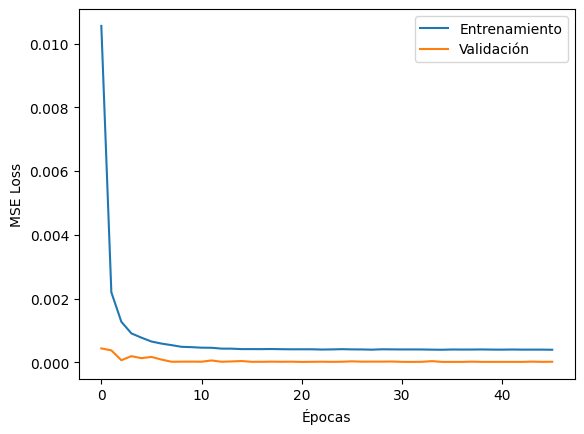

In [104]:
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [105]:
y_pred_scaled = regressorLSTM.predict(X_test_seq)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [106]:
mse_lstm = mean_squared_error(y_test_seq_scaled, y_pred_scaled)
mae_lstm  = mean_absolute_error(y_test_seq_scaled, y_pred_scaled)

In [107]:
print("Resultados de LSTM:")
print(f"MSE: {mse_lstm:.6f}")
print(f"MAE: {mae_lstm:.6f}\n")

Resultados de LSTM:
MSE: 0.000010
MAE: 0.002373



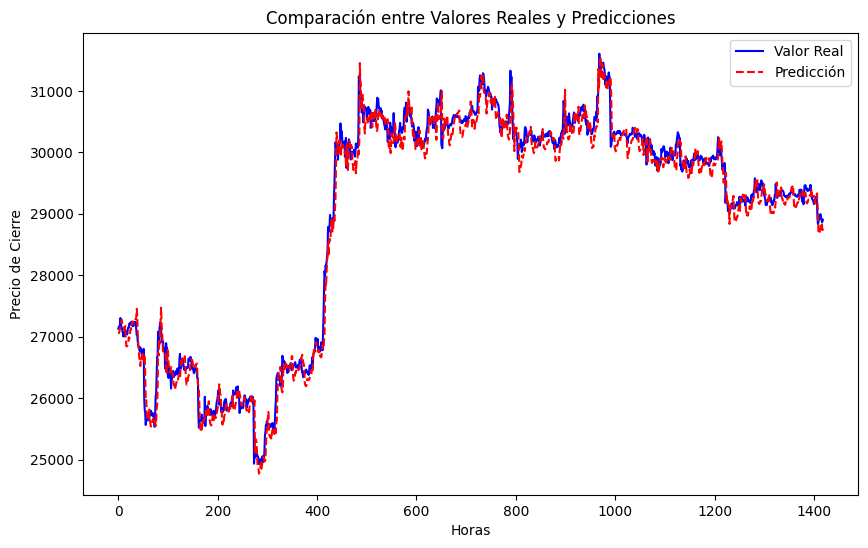

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_seq, label='Valor Real', color='blue')
plt.plot(y_pred, label='Predicción', color='red', linestyle='dashed')
plt.xlabel('Horas')
plt.ylabel('Precio de Cierre')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.legend()
plt.show()
